This is the script to compute mean ALFF values using templates. The script is commented by each cell so as to help understand the steps explicitly. We will be using nilearn for image manipulation. We will then perform a classification to identify site characteristics. 

The below cell downloads all the required modules. 

In [147]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pylab
import numpy as np
from nilearn import plotting
from nilearn import image
import nibabel as nib
from nibabel.testing import data_path

%matplotlib inline

Load the template and create the masker

In [148]:
img = nib.load('./resampled_accpcc_mask.nii')
template = img.get_data()

img_temp = template.copy()
img_temp[img_temp>0] = 1
img_temp[img_temp<0.1] = 0

In [149]:
new_template_img = nib.Nifti1Image(img_temp, img.affine, img.header)

In [150]:
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=new_template_img, standardize=True)

Load the excel sheet with filenames and the site target variable

In [151]:
filelist = pd.read_csv('./FileList.csv')
#filelist

In [152]:
filelist_list = np.array(list(filelist.values.flatten()))
filelist_list.shape

(358,)

In [153]:
!pwd

/Users/shrutivij/Google Drive/neurohack2017_ABIDE


Load individual subject ALFF maps and mask with template and compute mean ALFF for each mask

In [154]:
mean_alff_dmn = np.zeros(filelist_list.shape)

for ii,sub in enumerate(filelist_list):
    
    img2 = nib.load('./alff/'+sub)
    masker.fit(img2)
    fmri_masked = masker.transform(img2)
    
    mean_alff_dmn[ii] = fmri_masked.mean()

#img = img.get_data()
#img.shape

/Applications/anaconda/lib/python3.6/site-packages/nilearn/signal.py:53: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '


In [155]:
mean_alff_dmn.shape

(358,)

In [156]:
img = nib.load('./mask_SalienceNetwork.nii')
template = img.get_data()

img_temp = template.copy()
img_temp[img_temp>0] = 1
img_temp[img_temp<0.1] = 0

In [157]:
new_template_img = nib.Nifti1Image(img_temp, img.affine, img.header)

In [158]:
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=new_template_img, standardize=True)

In [159]:
mean_alff_sn = np.zeros(filelist_list.shape)

for ii,sub in enumerate(filelist_list):
    
    img2 = nib.load('./alff/'+sub)
    masker.fit(img2)
    fmri_masked = masker.transform(img2)
    
    mean_alff_sn[ii] = fmri_masked.mean()

#img = img.get_data()
#img.shape

/Applications/anaconda/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "
/Applications/anaconda/lib/python3.6/site-packages/nilearn/signal.py:53: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '


In [160]:
mean_alff_sn.shape

(358,)

In [161]:
img = nib.load('./mask_ExecutiveControlNetwork.nii')
template = img.get_data()

img_temp = template.copy()
img_temp[img_temp>0] = 1
img_temp[img_temp<0.1] = 0

In [162]:
new_template_img = nib.Nifti1Image(img_temp, img.affine, img.header)

In [163]:
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=new_template_img, standardize=True)

In [164]:
mean_alff_ecn = np.zeros(filelist_list.shape)

for ii,sub in enumerate(filelist_list):
    
    img2 = nib.load('./alff/'+sub)
    masker.fit(img2)
    fmri_masked = masker.transform(img2)
    
    mean_alff_ecn[ii] = fmri_masked.mean()

#img = img.get_data()
#img.shape

/Applications/anaconda/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "
/Applications/anaconda/lib/python3.6/site-packages/nilearn/signal.py:53: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '


In [165]:
mean_alff_ecn.shape

(358,)

In [166]:
Alff_params = np.array(list(map(list,zip(mean_alff_dmn,mean_alff_sn,mean_alff_ecn))))
Alff_params.shape

(358, 3)

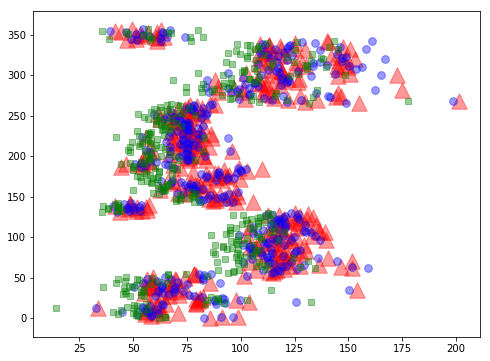

In [167]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
y= np.array(list(range(0,358)))
y.shape
s = 120
ax.scatter(Alff_params[:, 0], y, color='r', s=2*s, marker='^', alpha=.4)
ax.scatter(Alff_params[:, 1], y, color='b', s=s/2, alpha=.4)
ax.scatter(Alff_params[:,2], y, color='g', s=s/3, marker='s', alpha=.4)


In [168]:
df = pd.read_csv('./ALFF_classifiers2.csv')
dat = np.array(df)
#dat.shape
site_target = dat[:,5]
from sklearn import model_selection
from sklearn.model_selection import train_test_split
[X_train, X_test, Y_train, Y_test] = train_test_split(Alff_params,site_target,test_size=0.20)
X_train.shape

(286, 3)

In [169]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X_train, Y_train)

# predict the labels
y2 = clf.predict(X_test)

In [170]:
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [171]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y2))

             precision    recall  f1-score   support

        1.0       1.00      0.50      0.67         2
        2.0       0.43      0.50      0.46         6
        3.0       1.00      1.00      1.00         1
        4.0       0.40      0.33      0.36         6
        5.0       0.33      1.00      0.50         1
        6.0       0.65      0.85      0.73        13
        7.0       0.67      0.67      0.67         3
        8.0       1.00      0.50      0.67         2
        9.0       0.40      0.67      0.50         3
       10.0       0.50      0.33      0.40         3
       11.0       0.50      0.75      0.60         4
       12.0       0.00      0.00      0.00         3
       13.0       0.33      0.50      0.40         2
       14.0       0.78      0.88      0.82         8
       15.0       0.00      0.00      0.00         4
       16.0       1.00      0.62      0.77         8
       17.0       0.67      0.67      0.67         3

avg / total       0.59      0.60      0.57  

/Applications/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [172]:
mean_FD = np.transpose(pd.read_csv('./meanfdonly2.csv'))
mean_FD.shape

(1, 358)

In [173]:
df = pd.read_csv('./ALFF_classifiers2.csv')
# df.iloc[:,5:6].value
# site.value_counts()

df['site'].value_counts()
# freq
site_list = np.zeros((358,17))
site_list[0:3,0] = 1
site_list[3:18,1] = 1
site_list[18:27,2] = 1
site_list[27:52,3] = 1
site_list[52:67,4] = 1
site_list[67:131,5] = 1
site_list[131:143,6] = 1
site_list[143:154,7] = 1
site_list[154:172,8] = 1
site_list[172:186,9] = 1
site_list[186:198,10] = 1
site_list[198:211,11] = 1
site_list[211:232,12] = 1
site_list[232:266,13] = 1
site_list[266:305,14] = 1
site_list[305:343,15] = 1
site_list[343:358,16] = 1
site_list = np.transpose(site_list)
site_list.shape

(17, 358)

In [174]:
dat = np.transpose(np.vstack((mean_alff_dmn,mean_alff_sn,mean_alff_ecn,site_list,mean_FD)))
#dat = pd.concat([mean_alff_dmn,mean_alff_sn,mean_alff_ecn,site_list,mean_FD],axis=1)
dat.shape
df = pd.DataFrame(data = dat)
df.columns = ['D','S','E','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','m']

In [175]:
import statsmodels.formula.api as smf
import sys
mymodel = smf.ols("D~s1+s2+s3+s4+s5+s6+s7+s8+s9+s10+s11+s12+s13+s14+s15+s16+s17+m",data=df).fit()
Residues_dmn = np.array(list(mymodel.resid_pearson))
mymodel = smf.ols("S~s1+s2+s3+s4+s5+s6+s7+s8+s9+s10+s11+s12+s13+s14+s15+s16+s17+m",data=df).fit()
Residues_sn = np.array(list(mymodel.resid_pearson))
mymodel = smf.ols("E~s1+s2+s3+s4+s5+s6+s7+s8+s9+s10+s11+s12+s13+s14+s15+s16+s17+m",data=df).fit()
Residues_ecn = np.array(list(mymodel.resid_pearson))

In [176]:
site_regressed_alff = np.array(list(map(list,zip(Residues_dmn,Residues_sn,Residues_ecn))))
site_regressed_alff.shape

(358, 3)

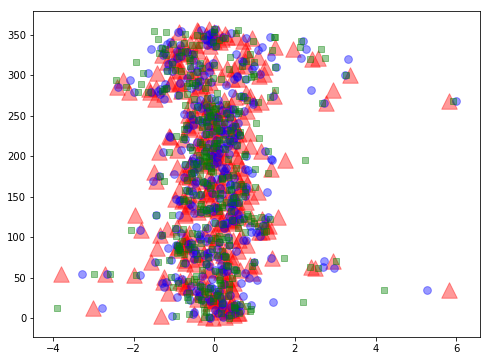

In [177]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
y= np.array(list(range(0,358)))
y.shape
s = 120
ax.scatter(site_regressed_alff[:,0], y, color='r', s=2*s, marker='^', alpha=.4)
ax.scatter(site_regressed_alff[:, 1], y, color='b', s=s/2, alpha=.4)
ax.scatter(site_regressed_alff[:,2], y, color='g', s=s/3, marker='s', alpha=.4)

In [179]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
[X_train, X_test, Y_train, Y_test] = train_test_split(Alff_params,site_target,test_size=0.20)
X_train.shape

(286, 3)

In [180]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X_train, Y_train)

# predict the labels
y2 = clf.predict(X_test)

In [181]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y2))

             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         2
        2.0       1.00      0.33      0.50         6
        3.0       1.00      1.00      1.00         4
        4.0       0.71      0.62      0.67         8
        5.0       0.00      0.00      0.00         1
        6.0       0.72      0.87      0.79        15
        7.0       0.00      0.00      0.00         0
        8.0       0.33      0.50      0.40         2
        9.0       0.00      0.00      0.00         5
       10.0       0.50      1.00      0.67         2
       11.0       0.00      0.00      0.00         1
       12.0       0.00      0.00      0.00         2
       13.0       0.00      0.00      0.00         2
       14.0       0.44      1.00      0.62         4
       15.0       0.00      0.00      0.00         5
       16.0       0.57      0.67      0.62         6
       17.0       0.80      0.57      0.67         7

avg / total       0.54      0.54      0.52  

/Applications/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


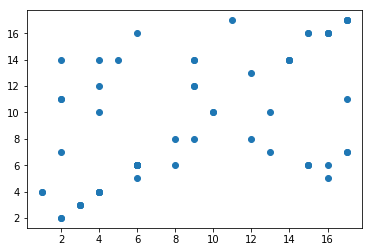

In [182]:
plt.plot(np.transpose(Y_test),np.transpose(y2),'o')

In [183]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(Y_test, y2, labels=[2,3,4,5,6,7,8,9,10,11,13,14,15,16,17])

In [184]:
c

array([[ 2,  0,  0,  0,  0,  1,  0,  0,  0,  2,  0,  1,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  1, 13,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  2,  0

In [185]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_test, Y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [186]:
y2 = clf.predict(X_test)
print(classification_report(Y_test, y2))
c = confusion_matrix(Y_test, y2, labels=[2,3,4,5,6,7,8,9,10,11,13,14,15,16,17])
print(c)

             precision    recall  f1-score   support

        1.0       0.25      0.50      0.33         2
        2.0       0.55      1.00      0.71         6
        3.0       0.80      1.00      0.89         4
        4.0       1.00      0.62      0.77         8
        5.0       0.00      0.00      0.00         1
        6.0       0.62      1.00      0.77        15
        8.0       0.00      0.00      0.00         2
        9.0       0.42      1.00      0.59         5
       10.0       0.00      0.00      0.00         2
       11.0       0.00      0.00      0.00         1
       12.0       0.00      0.00      0.00         2
       13.0       0.00      0.00      0.00         2
       14.0       1.00      0.25      0.40         4
       15.0       1.00      0.20      0.33         5
       16.0       1.00      0.33      0.50         6
       17.0       1.00      0.86      0.92         7

avg / total       0.67      0.64      0.58        72

[[ 6  0  0  0  0  0  0  0  0  0  0  0  0  0

/Applications/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [187]:
sum(y2==Y_test)/72

0.63888888888888884

In [188]:
y2

array([  2.,   6.,   6.,   3.,   4.,   3.,   3.,   2.,  14.,   2.,   9.,
         1.,   6.,   6.,   6.,   9.,   6.,   6.,   9.,   9.,   9.,   2.,
         9.,   3.,   6.,   2.,   6.,   9.,   6.,  16.,   2.,   9.,   2.,
         9.,  16.,   8.,   1.,  17.,  17.,   6.,   6.,   6.,   4.,   2.,
         6.,   9.,   4.,   6.,   9.,   9.,   4.,   2.,  17.,   2.,   6.,
         6.,   2.,   6.,  17.,   6.,   6.,  17.,   1.,   6.,  15.,   4.,
         6.,   1.,  17.,   6.,   6.,   3.])

In [189]:
Y_test

array([  4.,   6.,  15.,   3.,   4.,   3.,   3.,  17.,  14.,  11.,   5.,
         1.,   6.,   6.,  16.,  14.,   6.,   6.,  12.,   9.,  13.,   2.,
         9.,   3.,   6.,   2.,  15.,   9.,   6.,  16.,  13.,   1.,   2.,
         4.,  16.,  12.,  10.,  17.,  17.,   6.,   6.,  15.,   4.,   2.,
        15.,  14.,   4.,  16.,   9.,   9.,   4.,   2.,  17.,   4.,  16.,
         6.,   2.,  16.,  17.,   8.,   6.,  17.,   8.,   6.,  15.,   4.,
         6.,  10.,  17.,   6.,   6.,  14.])

In [190]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split

clf = SGDClassifier()
clf.fit(X_test, Y_test)
y2 = clf.predict(X_test)
print(classification_report(Y_test, y2))
c = confusion_matrix(Y_test, y2, labels=[2,3,4,5,6,7,8,9,10,11,13,14,15,16,17])
print(c)

             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         2
        2.0       0.00      0.00      0.00         6
        3.0       0.00      0.00      0.00         4
        4.0       0.11      1.00      0.20         8
        5.0       0.00      0.00      0.00         1
        6.0       0.00      0.00      0.00        15
        8.0       0.00      0.00      0.00         2
        9.0       0.00      0.00      0.00         5
       10.0       0.00      0.00      0.00         2
       11.0       0.00      0.00      0.00         1
       12.0       0.00      0.00      0.00         2
       13.0       0.00      0.00      0.00         2
       14.0       0.00      0.00      0.00         4
       15.0       0.00      0.00      0.00         5
       16.0       0.00      0.00      0.00         6
       17.0       0.00      0.00      0.00         7

avg / total       0.01      0.11      0.02        72

[[ 0  0  6  0  0  0  0  0  0  0  0  0  0  0

/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Applications/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
